## 1. Load and Preprocess the MNIST Dataset

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


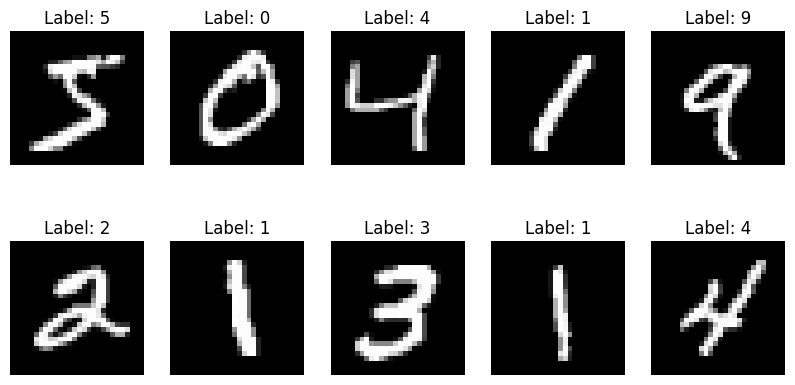

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Comment: 
# Load MNIST data & Split Into Training & Testing Sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

#Comment: 
# Normalize the pixel values to Range of [0, 1] by dividing by 255.
# This transformation is important because NN's perform better w/ scaled input data.
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Comment: 
# Flatten Images into 1D Vectors of Size 28 * 28.
# This helps with Compatibility w/ Denser Layers which expect input data in the 1D Format.
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

#Comment: 
# Visualize first 10 Images in Training Set w/ Labels.
# Provides a quick check for the data and gives the User a better understanding of what we are looking for.
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Build the Neural Network Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Build the neural network model
#Write you code here. Define "model" using Sequential, Input and Dense

# My Part 2 Model.
"""
model = Sequential([
    Input(shape=(784,)),  # Input layer for flattened MNIST images
    Dense(8, activation='relu'),  # Hidden layer with 8 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
"""

# My Part 3 Model.
"""
model = Sequential([
    Input(shape=(784,)),  # Input layer for flattened MNIST images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
"""

# My Part 4 Custom Model.
model = Sequential([
    Input(shape=(784,)),  # Input layer for flattened MNIST images
    Dense(512, activation='relu'),  # First hidden layer w/ 512 neurons.
    Dropout(0.2),  # Dropout for regularization.
    Dense(256, activation='relu'),  # Second hidden layer w/ 256 neurons.
    Dropout(0.2),  # Dropout for regularization.
    Dense(128, activation='relu'),  # Third hidden layer w/ 128 neurons.
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Neural Network

Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8797 - loss: 0.3897 - val_accuracy: 0.9666 - val_loss: 0.1139
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1157 - val_accuracy: 0.9694 - val_loss: 0.1037
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0856 - val_accuracy: 0.9781 - val_loss: 0.0717
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9787 - loss: 0.0699 - val_accuracy: 0.9786 - val_loss: 0.0696
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9760 - val_loss: 0.0780
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0544 - val_accuracy: 0.9786 - val_loss: 0.0772
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0484 - val_accuracy: 0.9817 - val_loss: 0.0754
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0422 - 

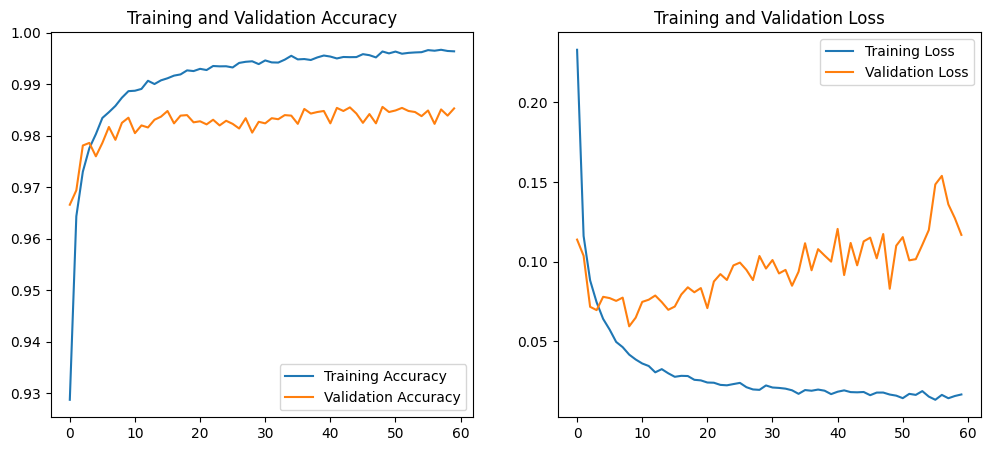

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

#Comment: 
# Compile Model w/ Adam Optimizer & Sparse Categorical Crossentropy Loss.
# Includes Accuracy as Metric to help us measure performance during and after training.
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Comment: 
# Save Best Model During Training Based on Validation Accuracy.
# This line monitors the 'val_accuracy' for the criterion for saving.
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

#Comment: 
# Train Model & Save Training History
# Use Training Data to Train Model, then Reference Test Data for Evaluation.
# Set Epochs to 60 for my Custom Model achieving F1 Score of 0.99.
# Set Batch Size to 32 for Weight Updates.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=32, callbacks=[checkpoint])

#Comment: 
# Plot Training & Validation Accuracy w/ Proper Labels.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

#Comment: 
# Plot Training & Validation Loss w/ Proper Labels.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.9819 - loss: 0.1066
Test Accuracy: 0.9856
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



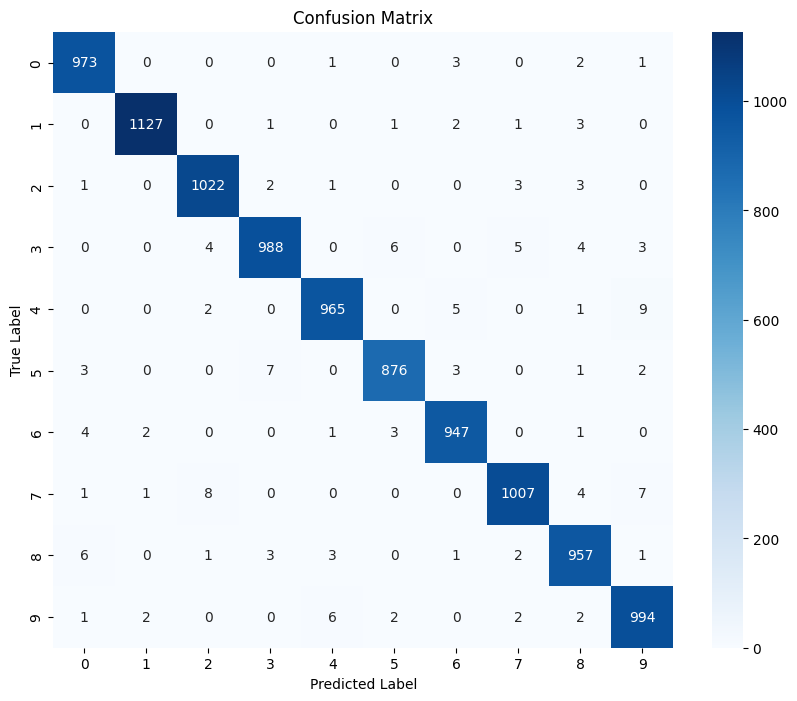

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

best_model = tf.keras.models.load_model('best_model.keras')

#Comment: 
# Evaluate Trained Model on Test Set for Evaluating Performance on Unseen Data.
# Display The Acurracy of the Test.
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

#Comment: 
# Generate Predictions on Test Data Set & Compute Classification Report.
# Display Classification Report for User to Analyze Specific Metrics.
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

#Comment: 
# Compute Confusion Matrix to Analyze Model's Performance in Predicting Each Class.
cm = confusion_matrix(y_test, y_pred_classes)

#Comment: 
# Visualize Confusion Matrix w/ Proper Title & Labels.
# Provides an easier view for the User to understand the model's predictions and misclassifications.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize Predictions

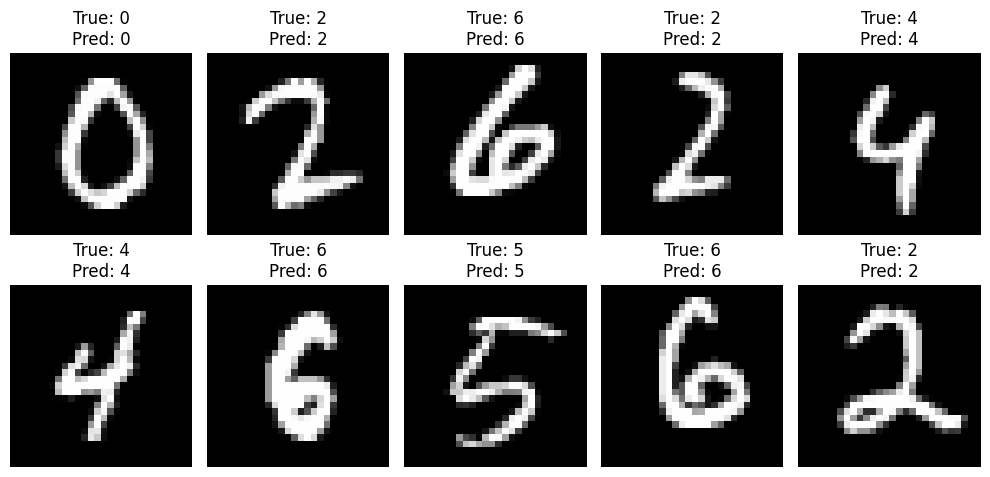

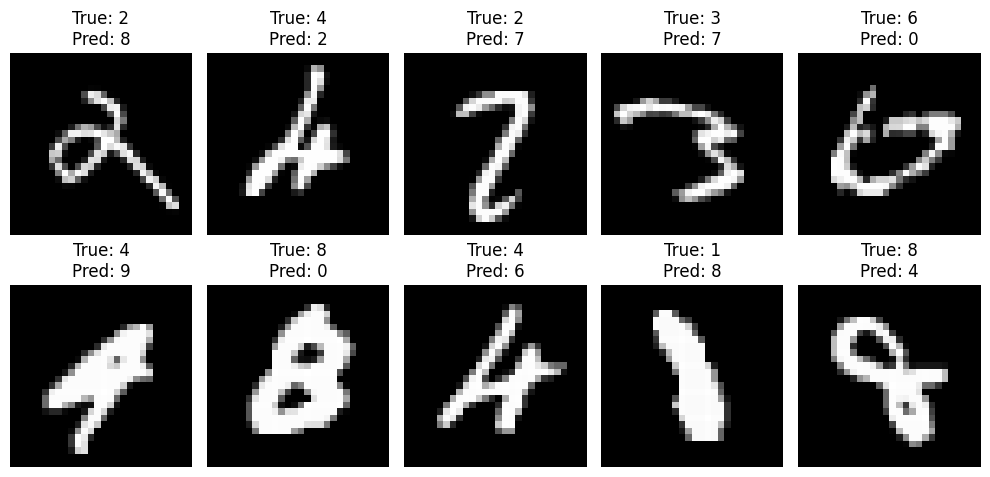

In [6]:
#Comment: 
# Randomly Select 10 Test Samples for Visualization.
indices = np.random.choice(len(X_test), 10, replace=False)

#Comment: 
# Visualize Predictions Based on Test Samples & Their Corresponding Predictions.
# Helps us assess how well the model is performing on random test cases.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Comment: 
# Identify Incorrect Predictions of Test Samples of Indices.
incorrect_indices = np.where(y_test != y_pred_classes)[0]

#Comment: 
# Visualize Those First 10 Incorrect Predictions to Analyze where Model Struggled.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
